# Integration Exercise

In this exercise we will calculate an approximation to an integral of a function. 

***(Can do this by hardcoding the function in if they haven't met python functions yet, but it's probably much more ideal to do this after meeting functions.) This exercise could be built upon as the module progresses. Start off with plotting functions (add more beef to the early parts) and later in the module approximate integrals using the previous work. Also need to think about when/where(/if) to import numpy***

Before we talk about integrals, we're going to get to grips with the function we want to integrate. To begin with, lets write a python function which evaluates the function

$$f(x) = x^2 -5x + 14$$

for a given value of $x$. 

In [9]:
def f1(x):
    return x**2 - 5*x + 14

Now calculate the value of $f(247)$, and print the answer.

In [10]:
print(f1(247))

59788


Next we should take a look at this function. This is a good way to get a feel for how it behaves. Lets plot the function between the values of $x = -5$ and $x=20$.

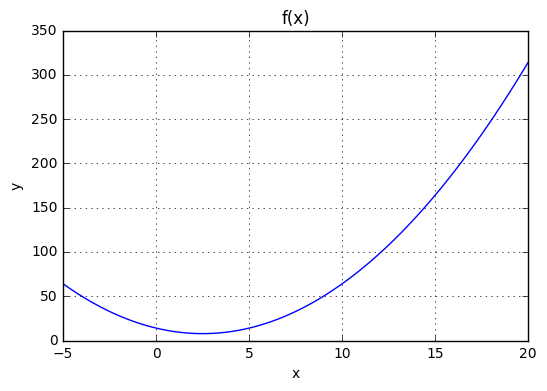

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#first we need to generate values of x between -20 and 20
x = np.linspace(-5, 20, 500)
#now we pass these values of x to the function f1, to obtain the y values
y = f1(x)
#now we plot the function
plt.plot(x, y)
#set the title of the plot to "f(x)"
plt.title('f(x)')
#label the x and y axes appropriately
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Great! Now we can see what our function looks like! We should have expected this plot, if we notice that our function is a quadratic with a positive coefficient in front of the $x^2$ term. 

The next thing we are going to do is calculate the following integral:

$$\int_{5}^{15} f(x) dx = \int_{5}^{15} x^2 - 5x + 14 dx$$

First recall that an integral is *the area under the curve.* 

***Add in plot here of relevant shaded region, can generate it with pyplot but just attach an image.*** 
***Then consider also adding in a plot with rectangles approximating the integral to highlight the method. Alternatively, I could restrict the plot to just the bounds of the integral, and then the entire bottom half of the image is the area, perhaps this is clearer?***

How are we going to get the area under this curve? Well, while finding the area of a region bounded by a curve might be difficult, we *are* able to find the area of a rectangle pretty easily, that's just the width multiplied by the height. We could put some rectangles under the curve, and calculate the area of those instead. All we'll have to do is calculate the area of each individual rectangle and then add them all up. That would at least give us some estimate of the area we desire.

To make life as simple as possible, we'll make the width of all of our rectangles equal. The total width of area we are trying to calculate is $15 - 5 = 10$. Lets start with rectangles which have a width of 2. This means we need 5 rectangles to fill our interval. 

The only other thing we need to figure out is the height of our rectangles. These heights shouldn't all be the same, they should in some way follow the function. Lets start by making the height of each rectangle the *value of the function at the left side of the rectangle.* (Note that we are making a choice here. We could also choose the right side of the rentangle, or even the middle of the rectangle, which turns out to be a better choice for reasons beyond the scope of this module).

Now that we have decided what the height of each rectangle should be, lets calculate our estimate!

In [19]:
#set the number of rectangles
n = 5
#calculate the corresponding width
width = (15 - 5)/n

#next we need to generate a list of the positions of the rectangles, so we can work out the height of each rectangle
#note that if we have 5 renctangles, we need 6 points //// fence and fenceposts discussion prior???
rect_pos = np.linspace(5, 15, n+1)

#now we use these positions to calculate the height of each rectangle
heights = f1(rect_pos)

area = 0
for i in heights[:-1]:
    area += i
area *= width

print(area)

580.0


If we add more rectangles, we could get a better estimate! Lets write a function which takes as input the number of rectangles we want to use in the calculation and returns an estimate of the area using that many rectangles. You shouldn't have to change the code from the previous step much to achieve this!

In [20]:
def estimate_area(n):
    #calculate the width of our rectangles
    width = (15-5)/n
    
    #create a list of the x coordinates of the rectangles' sides
    rect_pos = np.linspace(5, 15, n+1)
    #work out the height of the function to be integrated at each of these points
    heights = f1(rect_pos)
    
    area = 0
    #sum up all of these heights except for the last one
    for i in heights[:-1]:
        area += i
    #the total area is this sum of heights times the width
    return area * width

Now lets try *a lot* more rectangles and see what we get! 

In [21]:
print(estimate_area(1000))

722.5835


We could calculate the exact value of this integral by hand to compare our estimate with the actual area. 

$$\int_5^{15} x^2 - 5x +14 dx = \bigg{(}\frac{x^3}{3} - \frac{5}{2}x^2 + 14x \bigg{)}\Bigg{|}_{x=5}^{x=15} = \frac{15^3}{3} - \frac{5}{2}15^2 + 14(15) - \bigg(\frac{5^3}{3} - \frac{5}{2}5^2 + 14(5) \bigg) = \frac{2170}{3} \approx 723.33$$

Lets try *even more* rectangles.

In [22]:
print(estimate_area(10000))

723.258335
